In [1]:
import numpy as np
import sympy
from sympy import Symbol
from sympy import Rational
import matplotlib.pyplot as plt
import csv
#import scipy

# 构造勒让德多项式，并存储在P中

In [2]:
max_n = 40
x = Symbol('x')
Lgd = [sympy.numer(1), x]

for i in range(2,max_n + 1):
    Lgd.append(sympy.simplify(Rational(2 * i - 1, i) * x * Lgd[i - 1] - Rational(i - 1, i) * Lgd[i - 2]))
for i in range(max_n + 1):
    print(i, Lgd[i])

0 1
1 x
2 3*x**2/2 - 1/2
3 x*(5*x**2 - 3)/2
4 35*x**4/8 - 15*x**2/4 + 3/8
5 x*(63*x**4 - 70*x**2 + 15)/8
6 231*x**6/16 - 315*x**4/16 + 105*x**2/16 - 5/16
7 x*(429*x**6 - 693*x**4 + 315*x**2 - 35)/16
8 6435*x**8/128 - 3003*x**6/32 + 3465*x**4/64 - 315*x**2/32 + 35/128
9 x*(12155*x**8 - 25740*x**6 + 18018*x**4 - 4620*x**2 + 315)/128
10 46189*x**10/256 - 109395*x**8/256 + 45045*x**6/128 - 15015*x**4/128 + 3465*x**2/256 - 63/256
11 x*(88179*x**10 - 230945*x**8 + 218790*x**6 - 90090*x**4 + 15015*x**2 - 693)/256
12 676039*x**12/1024 - 969969*x**10/512 + 2078505*x**8/1024 - 255255*x**6/256 + 225225*x**4/1024 - 9009*x**2/512 + 231/1024
13 x*(1300075*x**12 - 4056234*x**10 + 4849845*x**8 - 2771340*x**6 + 765765*x**4 - 90090*x**2 + 3003)/1024
14 5014575*x**14/2048 - 16900975*x**12/2048 + 22309287*x**10/2048 - 14549535*x**8/2048 + 4849845*x**6/2048 - 765765*x**4/2048 + 45045*x**2/2048 - 429/2048
15 x*(9694845*x**14 - 35102025*x**12 + 50702925*x**10 - 37182145*x**8 + 14549535*x**6 - 2909907*x**4 + 

# 构造目标函数

In [3]:
f = sympy.exp(x)

# 计算勒让德多项式的模长

In [4]:
norm = []
for i in range(max_n + 1):
    norm.append(sympy.integrate(Lgd[i] ** 2, (x, -1, 1)))
print(norm)

[2, 2/3, 2/5, 2/7, 2/9, 2/11, 2/13, 2/15, 2/17, 2/19, 2/21, 2/23, 2/25, 2/27, 2/29, 2/31, 2/33, 2/35, 2/37, 2/39, 2/41, 2/43, 2/45, 2/47, 2/49, 2/51, 2/53, 2/55, 2/57, 2/59, 2/61, 2/63, 2/65, 2/67, 2/69, 2/71, 2/73, 2/75, 2/77, 2/79, 2/81]


# 计算f在以勒让德多项式为基的空间中的分量

In [5]:
coef_poly = []
for i in range(max_n + 1):
    coef_poly.append(sympy.integrate(f * Lgd[i], (x, -1, 1))/ norm[i])
print(coef_poly)

[-exp(-1)/2 + E/2, 3*exp(-1), -35*exp(-1)/2 + 5*E/2, -35*E/2 + 259*exp(-1)/2, -1197*exp(-1) + 162*E, -3619*E/2 + 26741*exp(-1)/2, -351091*exp(-1)/2 + 47515*E/2, -358830*E + 2651415*exp(-1), -90607229*exp(-1)/2 + 12262355*E/2, -233893781*E/2 + 1728254269*exp(-1)/2, -18202633113*exp(-1) + 2463458508*E, -113602225945*E/2 + 839413220471*exp(-1)/2, -21028670114425*exp(-1)/2 + 2845921026025*E/2, -38486613418740*E + 284379745608927*exp(-1), -16518418502650499*exp(-1)/2 + 2235524846677109*E/2, -69389646914840819*E/2 + 512723993738748931*exp(-1)/2, -8469344307216727473*exp(-1) + 1146201110645569110*E, -80312420894932399915*E/2 + 593432983433585639645*exp(-1)/2, -21976012250034609207259*exp(-1)/2 + 2974129842269704012435*E/2, -58040277415900690579578*E + 428862865823587877255067*exp(-1), -35191106794892352393766781*exp(-1)/2 + 4762598405496641975214851*E/2, -204919717689118873123721765*E/2 + 1514163289781930859533098141*exp(-1)/2, -34087986212846738923125433845*exp(-1) + 461330726908136182685550

# 由上面计算得出的系数构造最佳平方逼近多项式，以及其误差

In [6]:
P = []
epsilon = []
for i in range(max_n + 1):
    tmp_p = 0
    for j in range(i + 1):
        tmp_p += coef_poly[j] * Lgd[j]
    P.append(sympy.simplify(tmp_p))
    epsilon.append(sympy.simplify(f - P[i]))
for i in range(max_n + 1):
    print(i, P[i], epsilon[i])

0 sinh(1) exp(x) - sinh(1)
1 (6*x - 1 + exp(2))*exp(-1)/2 (-6*x + 2*exp(x + 1) - exp(2) + 1)*exp(-1)/2
2 (12*x + 5*(-7 + exp(2))*(3*x**2 - 1) - 2 + 2*exp(2))*exp(-1)/4 (-12*x + 5*(7 - exp(2))*(3*x**2 - 1) + 4*exp(x + 1) - 2*exp(2) + 2)*exp(-1)/4
3 (-7*x*(-37 + 5*exp(2))*(5*x**2 - 3) + 12*x + 5*(-7 + exp(2))*(3*x**2 - 1) - 2 + 2*exp(2))*exp(-1)/4 (-7*x*(37 - 5*exp(2))*(5*x**2 - 3) - 12*x + 5*(7 - exp(2))*(3*x**2 - 1) + 4*exp(x + 1) - 2*exp(2) + 2)*exp(-1)/4
4 5*(-8379*x**4 + 1134*x**4*exp(2) - 70*x**3*exp(2) + 518*x**3 - 966*x**2*exp(2) + 7140*x**2 - 306*x + 42*x*exp(2) - 705 + 96*exp(2))*exp(-1)/8 (-5670*x**4*exp(2) + 41895*x**4 - 2590*x**3 + 350*x**3*exp(2) - 35700*x**2 + 4830*x**2*exp(2) - 210*x*exp(2) + 1530*x + 8*exp(x + 1) - 480*exp(2) + 3525)*exp(-1)/8
5 3*(-75999*x**5*exp(2) + 561561*x**5 - 27930*x**4 + 3780*x**4*exp(2) - 622230*x**3 + 84210*x**3*exp(2) - 3220*x**2*exp(2) + 23800*x**2 - 17955*x*exp(2) + 132685*x - 2350 + 320*exp(2))*exp(-1)/16 (-1684683*x**5 + 227997*x**5*exp(2)

# 画出图像

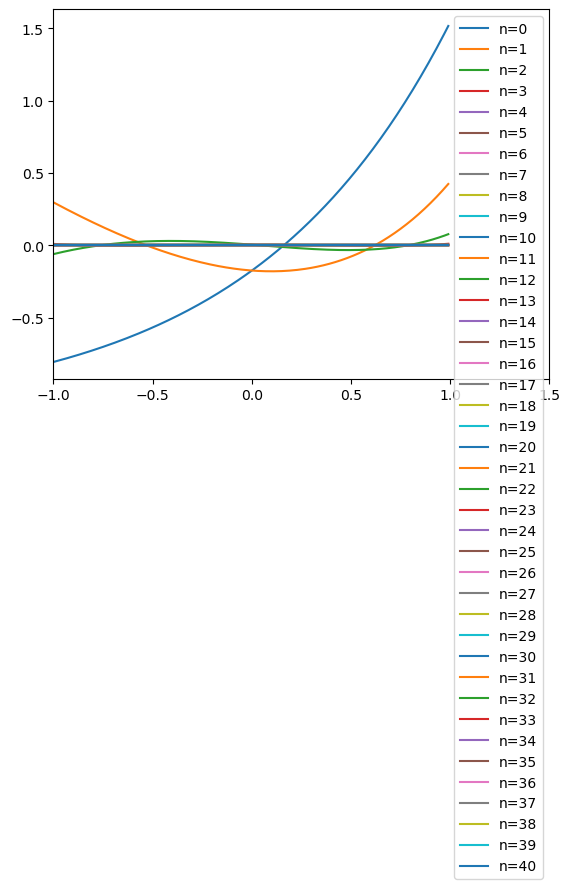

In [7]:
x_range = np.arange(-1, 1, 0.01)
error = []
for i in range(max_n + 1):
    tmp_error = []
    for x_ in x_range:
        tmp_error.append(epsilon[i].evalf(subs = {x:x_}))
    error.append(tmp_error)
    tmp_error = np.array(tmp_error)
    if i <= 10:
        plt.plot(x_range, tmp_error, label = "n=" + str(i))
plt.xlim(-1, 1.5)
plt.legend(loc='best')
plt.savefig("误差.svg", dpi=300,format='svg')
plt.show()

# 上面的计算得到的都是解析解，现在求数值解

In [8]:
P_float = []
epsilon_float = []
for i in range(max_n + 1):
    P_float.append(sympy.simplify(P[i].evalf()))
    epsilon_float.append(sympy.simplify(epsilon[i].evalf()))
for i in range(max_n + 1):
    print(i, P_float[i], epsilon_float[i])

0 1.17520119364380 exp(x) - 1.1752011936438
1 1.10363832351433*x + 1.1752011936438 -1.10363832351433*x + 0.367879441171442*exp(x + 1) - 1.1752011936438
2 0.536721525971059*x**2 + 1.10363832351433*x + 0.996294018320115 -0.536721525971059*x**2 - 1.10363832351433*x + 0.367879441171442*exp(x + 1) - 0.996294018320115
3 0.176139084171224*x**3 + 0.536721525971059*x**2 + 0.997954873011593*x + 0.996294018320115 -0.176139084171224*x**3 - 0.536721525971059*x**2 - 0.997954873011593*x + 0.367879441171442*exp(x + 1) - 0.996294018320115
4 0.0435974356513095*x**4 + 0.176139084171224*x**3 + 0.499352295412685*x**2 + 0.997954873011593*x + 1.00003094137593 -0.0435974356513931*x**4 - 0.176139084171219*x**3 - 0.499352295412685*x**2 - 0.997954873011598*x + 0.367879441171442*exp(x + 1) - 1.00003094137594
5 0.00865924075198658*x**5 + 0.0435974356513931*x**4 + 0.166517705557217*x**3 + 0.499352295412769*x**2 + 1.00001659699943*x + 1.00003094137595 -0.0086592407493099*x**5 - 0.0435974356513931*x**4 - 0.1665177055

# 将数值解以latex公式形式给出

In [9]:
latex_formula = [["", "数值近似多项式", "数值误差", "近似多项式", "误差", "勒让德多项式"]]
for i in range(max_n + 1):
    latex_formula.append(["n=" + str(i),
                          sympy.latex(P_float[i]), sympy.latex(epsilon_float[i]),
                          sympy.latex(P[i]), sympy.latex(epsilon[i]),
                          sympy.latex(Lgd[i])])
with open('latex_formula.csv', 'w') as f:
    write = csv.writer(f)
    write.writerows(latex_formula)

# 画出误差图像并计算误差极值

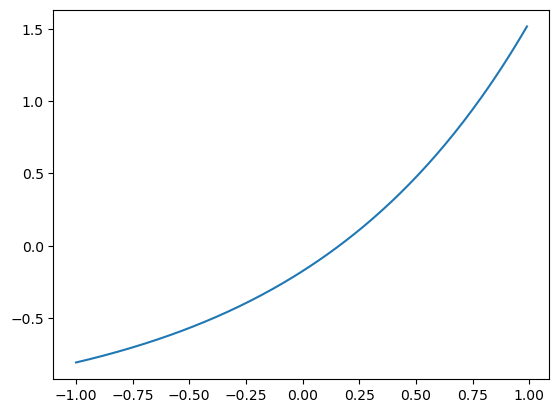

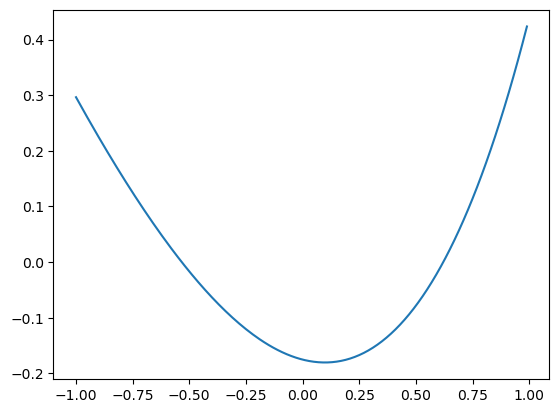

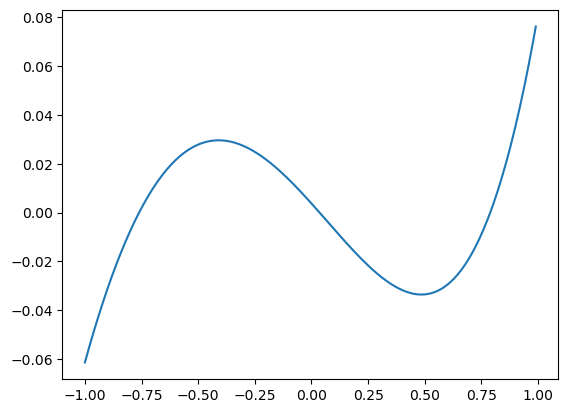

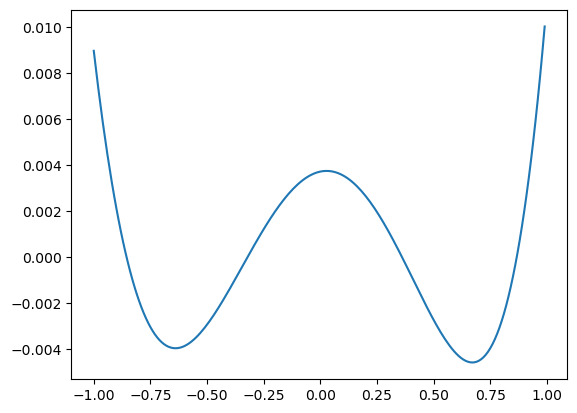

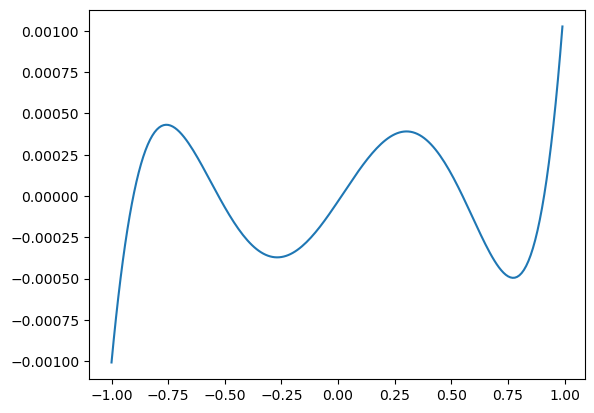

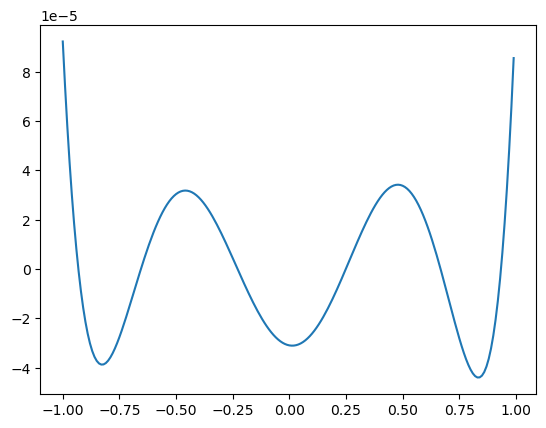

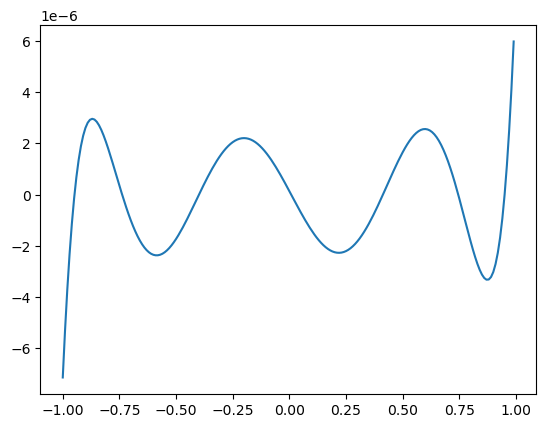

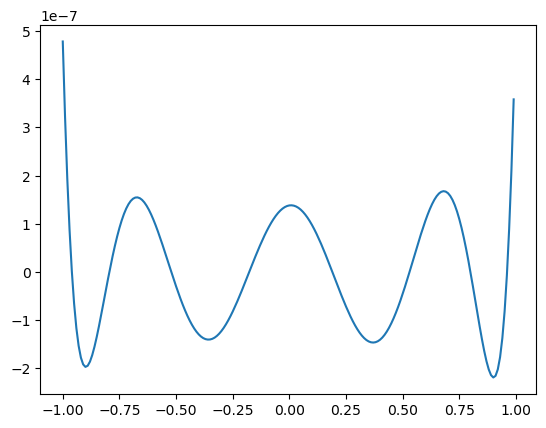

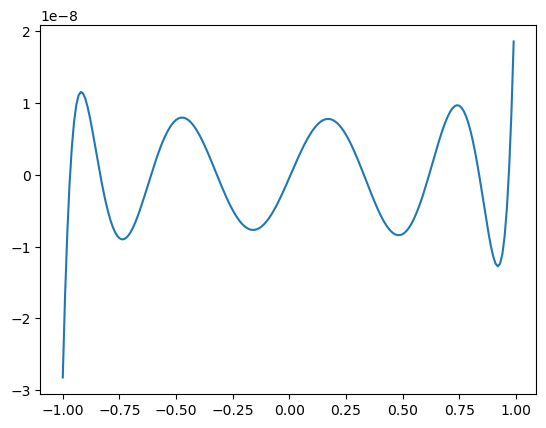

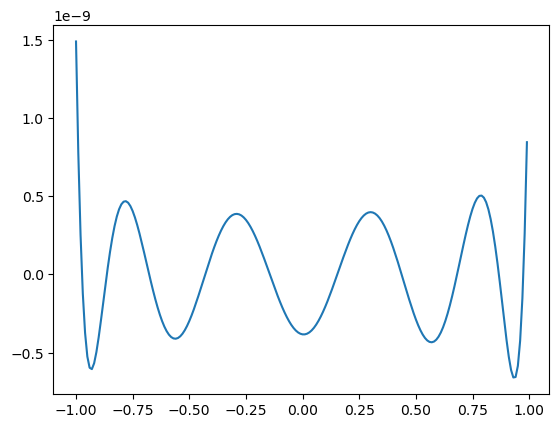

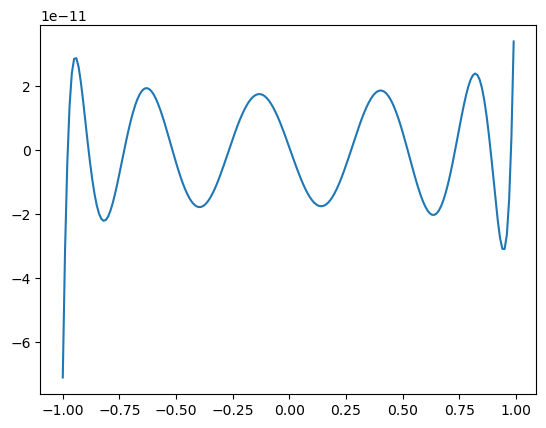

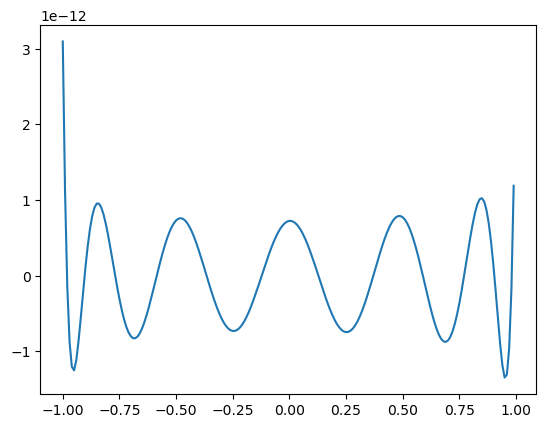

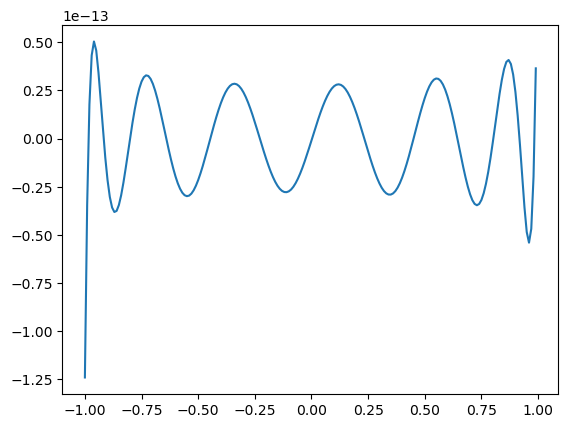

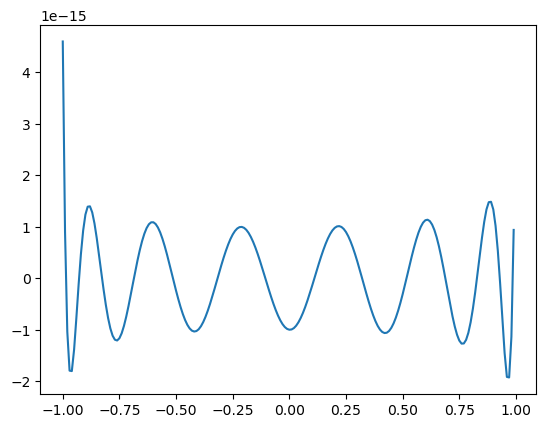

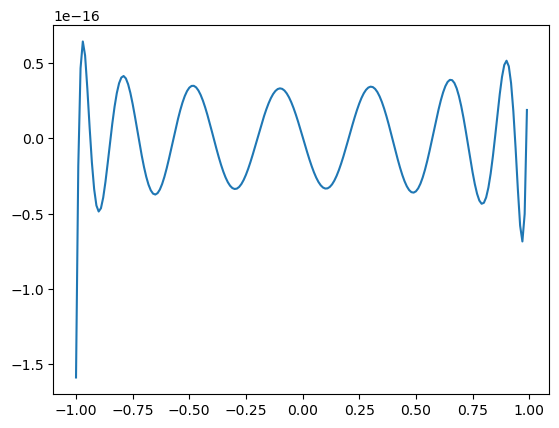

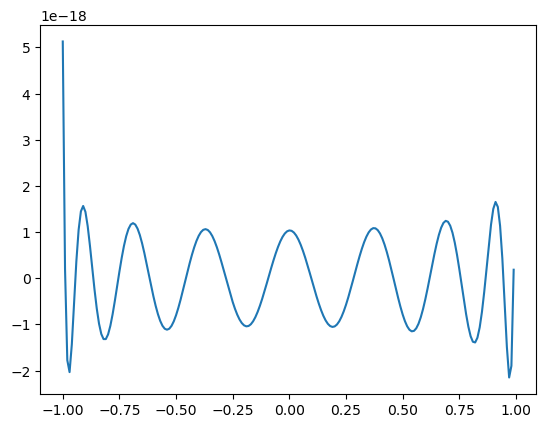

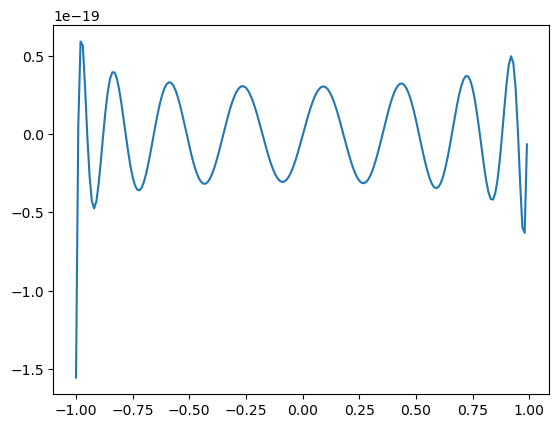

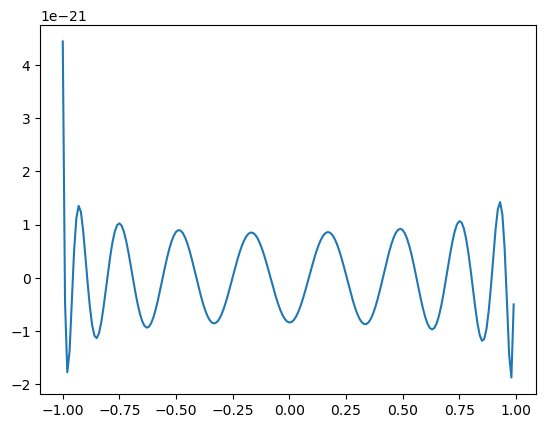

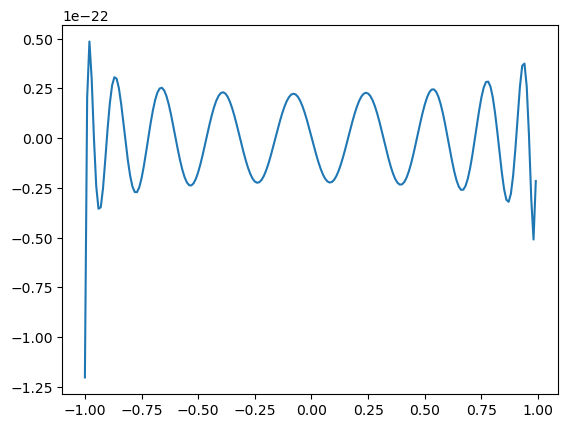

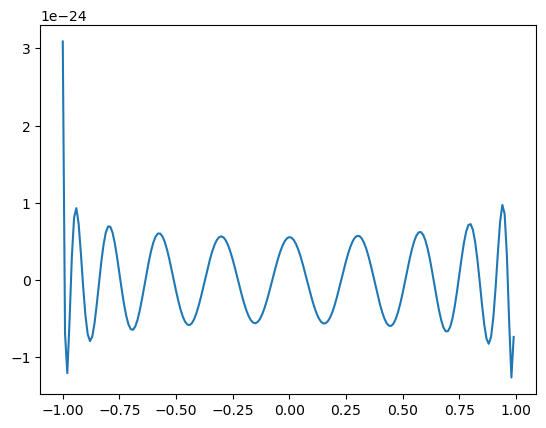

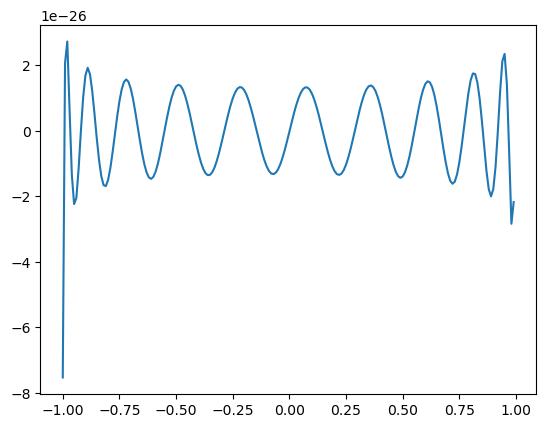

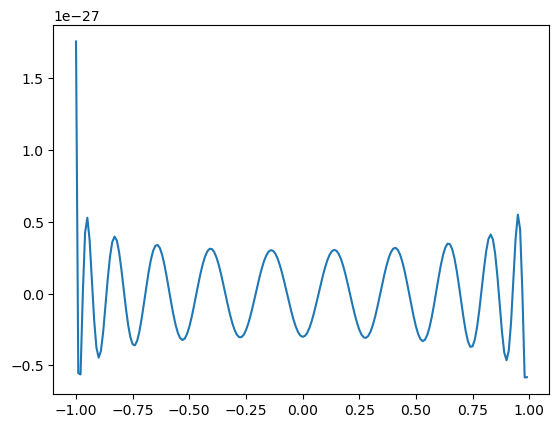

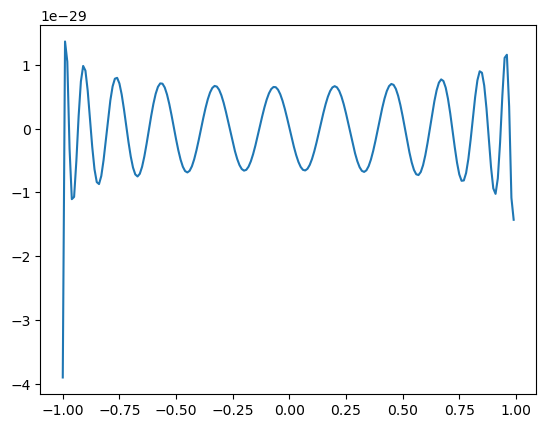

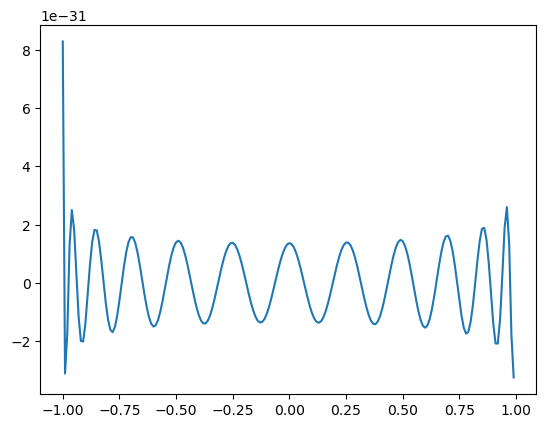

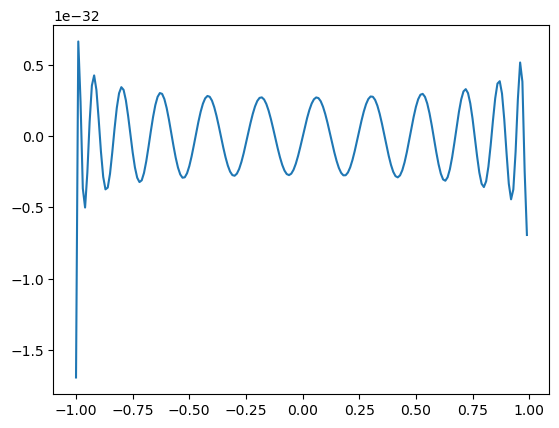

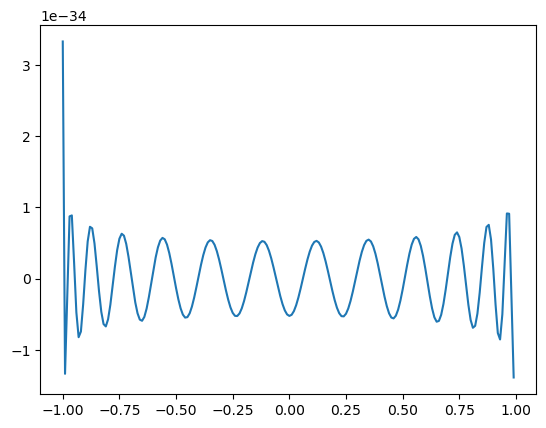

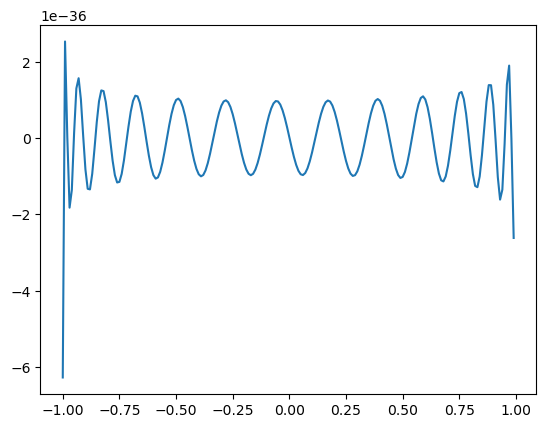

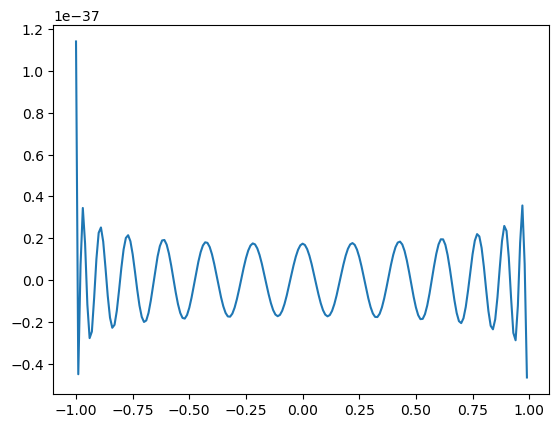

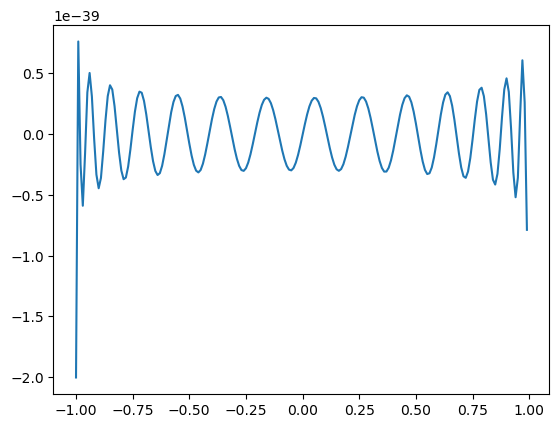

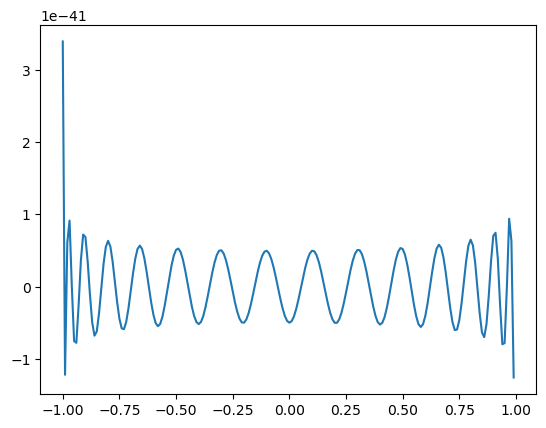

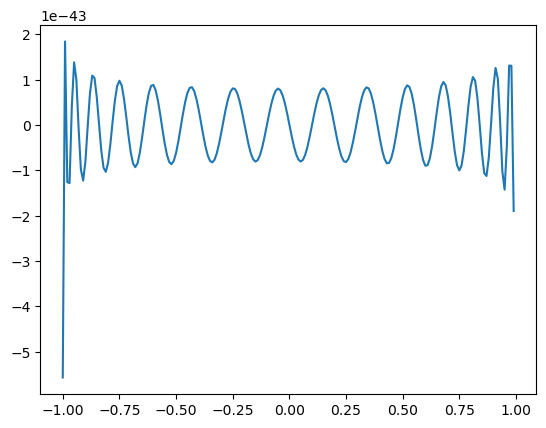

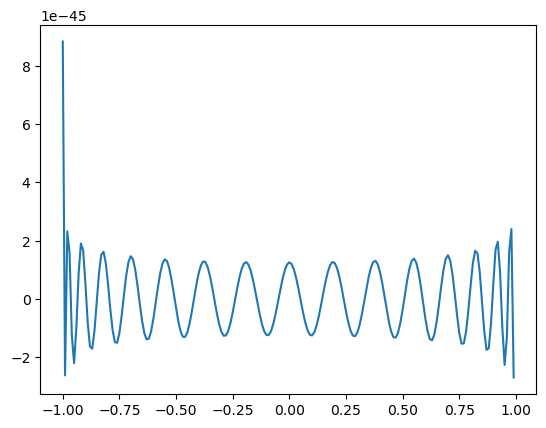

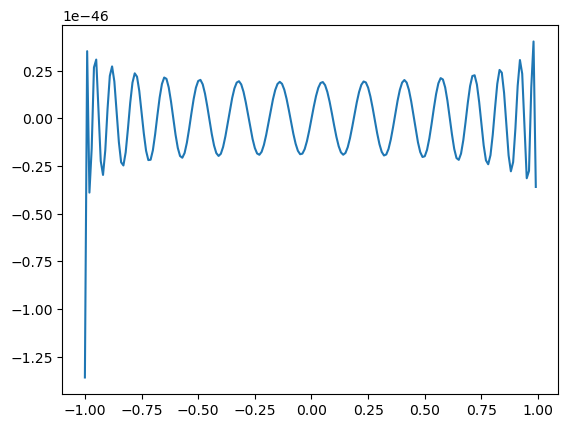

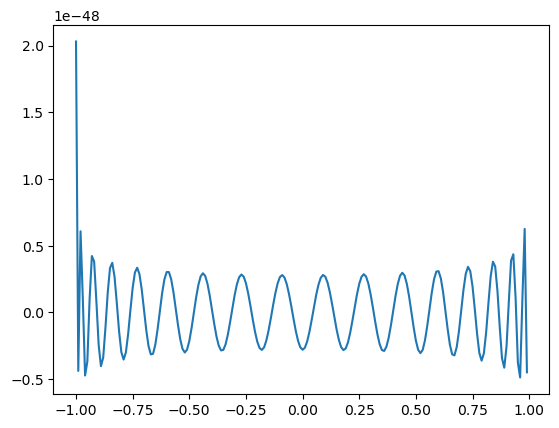

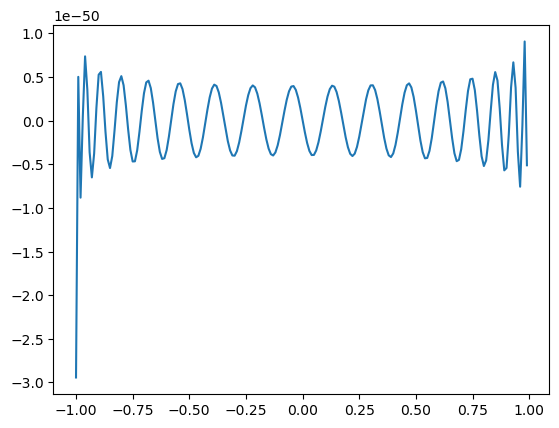

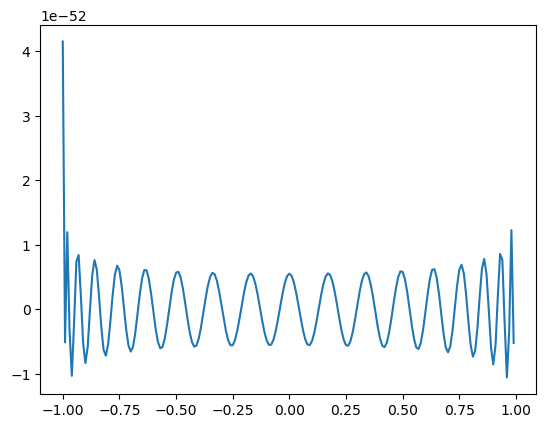

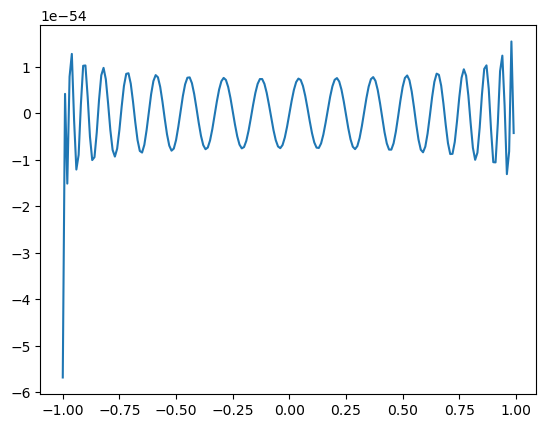

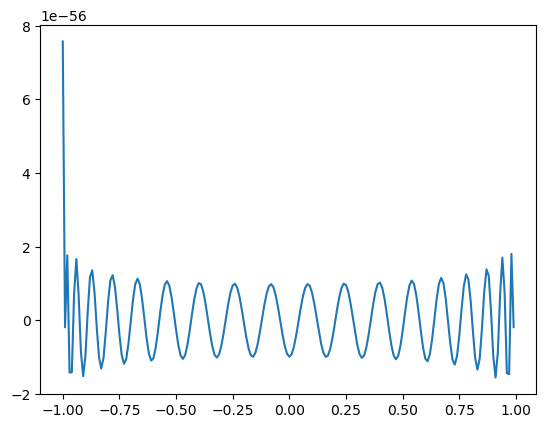

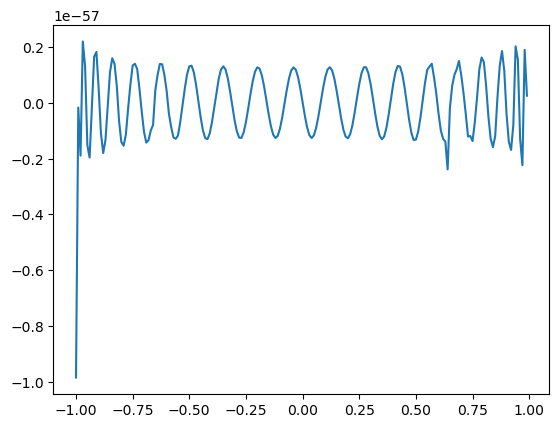

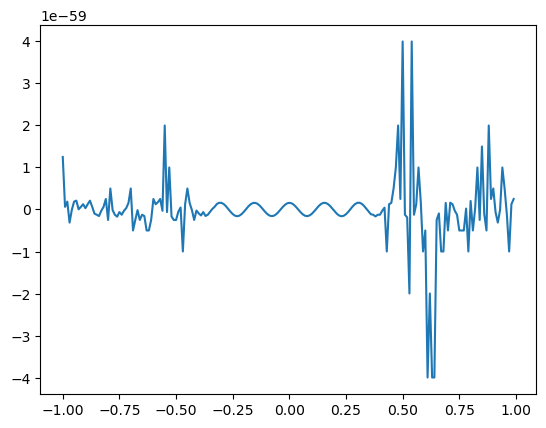

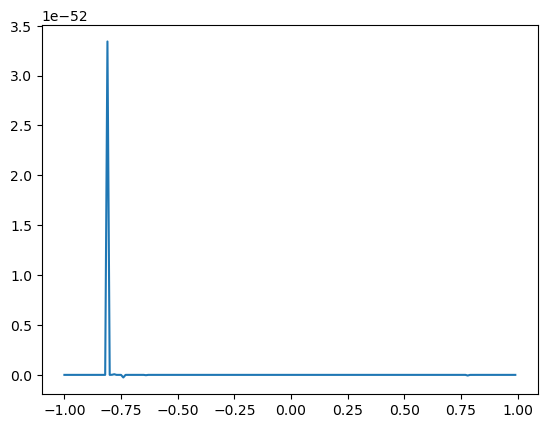

[199 199 199 199 199   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 150  19]
[1.51603327870547 0.423431338426280 0.0762977461457297 0.0100167849111821
 0.00102592199263293 9.23120414227268e-5 7.14229769069819e-6
 4.78243618165514e-7 2.82283563996151e-8 1.48978475696039e-9
 7.11018883495221e-11 3.09719590327914e-12 1.24085050395897e-13
 4.60201888391880e-15 1.58878264460653e-16 5.13042000954950e-18
 1.55609595210140e-19 4.44960778609840e-21 1.20347295712696e-22
 3.08785232006107e-24 7.53581816158400e-26 1.75346188126356e-27
 3.89850286123413e-29 8.29843589115682e-31 1.69426265859726e-32
 3.32335912780489e-34 6.27271836167756e-36 1.14087082267490e-37
 2.00214311955731e-39 3.39443675398567e-41 5.56614442906541e-43
 8.83737388435451e-45 1.35991750193116e-46 2.03017940185315e-48
 2.94290650979934e-50 4.1457604e-52 5.68019e-54 7.57493e-56 9.84e-58
 0.e-59 0.e-52]


In [10]:
for err in error:
    plt.plot(x_range, err)
    plt.show()
abs_error = np.abs(error)
extreme_point = np.argmax(abs_error, axis = 1)
print(extreme_point)
max_error = np.max(abs_error, axis=1)
print(max_error)

# 画出误差极值图像和极值对数图像

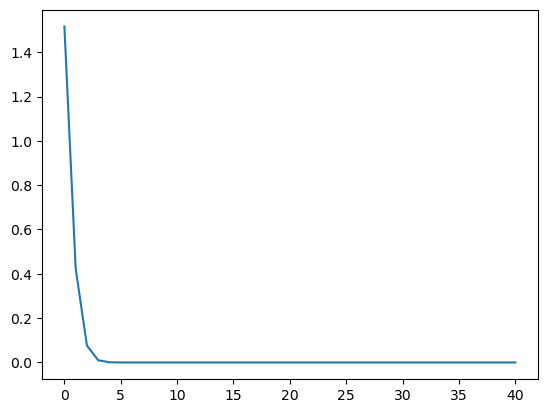

/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_68092/1593124892.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  log_error = np.log(np.array(max_error, dtype=np.float))


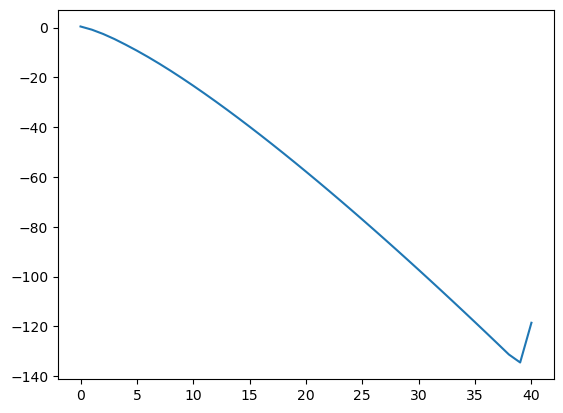

In [11]:
n = np.arange(0, max_n + 1)
plt.plot(n, max_error)
plt.show()
log_error = np.log(np.array(max_error, dtype=np.float))
plt.plot(n, log_error)
plt.savefig("log_error.svg", dpi = 300, format = "svg")
plt.show()

# 对对数误差进行最小二乘法

In [12]:
used_n = 20
order = 3
A=[]
for i in range(order + 1):
    A.append(n ** i)
A = np.array(A)
A = np.transpose(A)
An = A[0:used_n]
ATA = np.matmul(np.transpose(An), An)
ATB = np.matmul(np.transpose(An), log_error[0:used_n])
ATB1 = np.matmul(np.transpose(An), max_error[0:used_n])
coef_error = np.matmul(np.linalg.inv(ATA), ATB)
coef_error1 = np.matmul(np.linalg.inv(ATA), ATB1)
print(log_error)
print(coef_error)
print(coef_error1)

[   0.41609724   -0.85936391   -2.57311188   -4.6034931    -6.88216357
   -9.29033597  -11.84947603  -14.55314557  -17.38293882  -20.32463419
  -23.36690722  -26.50052396  -29.71780917  -33.0122813   -36.3783934
  -39.81134414  -43.30693668  -46.861471    -50.47166054  -54.13456642
  -57.84754501  -61.60820546  -65.4143751   -69.26407083  -73.15547534
  -77.0869171   -81.05685354  -85.06385659  -89.10660046  -93.18385097
  -97.29445639 -101.43733942 -105.61149024 -109.8159603  -114.04985695
 -118.31233862 -122.60261049 -126.9199208  -131.26330707 -134.47055303
 -118.52816788]
[ 0.65107    -1.48276383 -0.11101957  0.00197944]
[1.02590682793058 -0.372383279356719 0.0371489358711674
 -0.00109407977978011]


# 画图

[   0.65107      -0.94073398   -2.74270048   -4.74295292   -6.92961466
   -9.29080911  -11.81465964  -14.48928964  -17.30282251  -20.24338163
  -23.29909038  -26.45807216  -29.70845036  -33.03834836  -36.43588954
  -39.8891973   -43.38639503  -46.91560611  -50.46495393  -54.02256188
  -57.57655334  -61.11505171  -64.62618037  -68.09806271  -71.51882211
  -74.87658197  -78.15946567  -81.3555966   -84.45309815  -87.44009371
  -90.30470666  -93.03506039  -95.61927829  -98.04548374 -100.30180014
 -102.37635087 -104.25725933 -105.93264889 -107.39064294 -108.61936488
 -109.60693809]


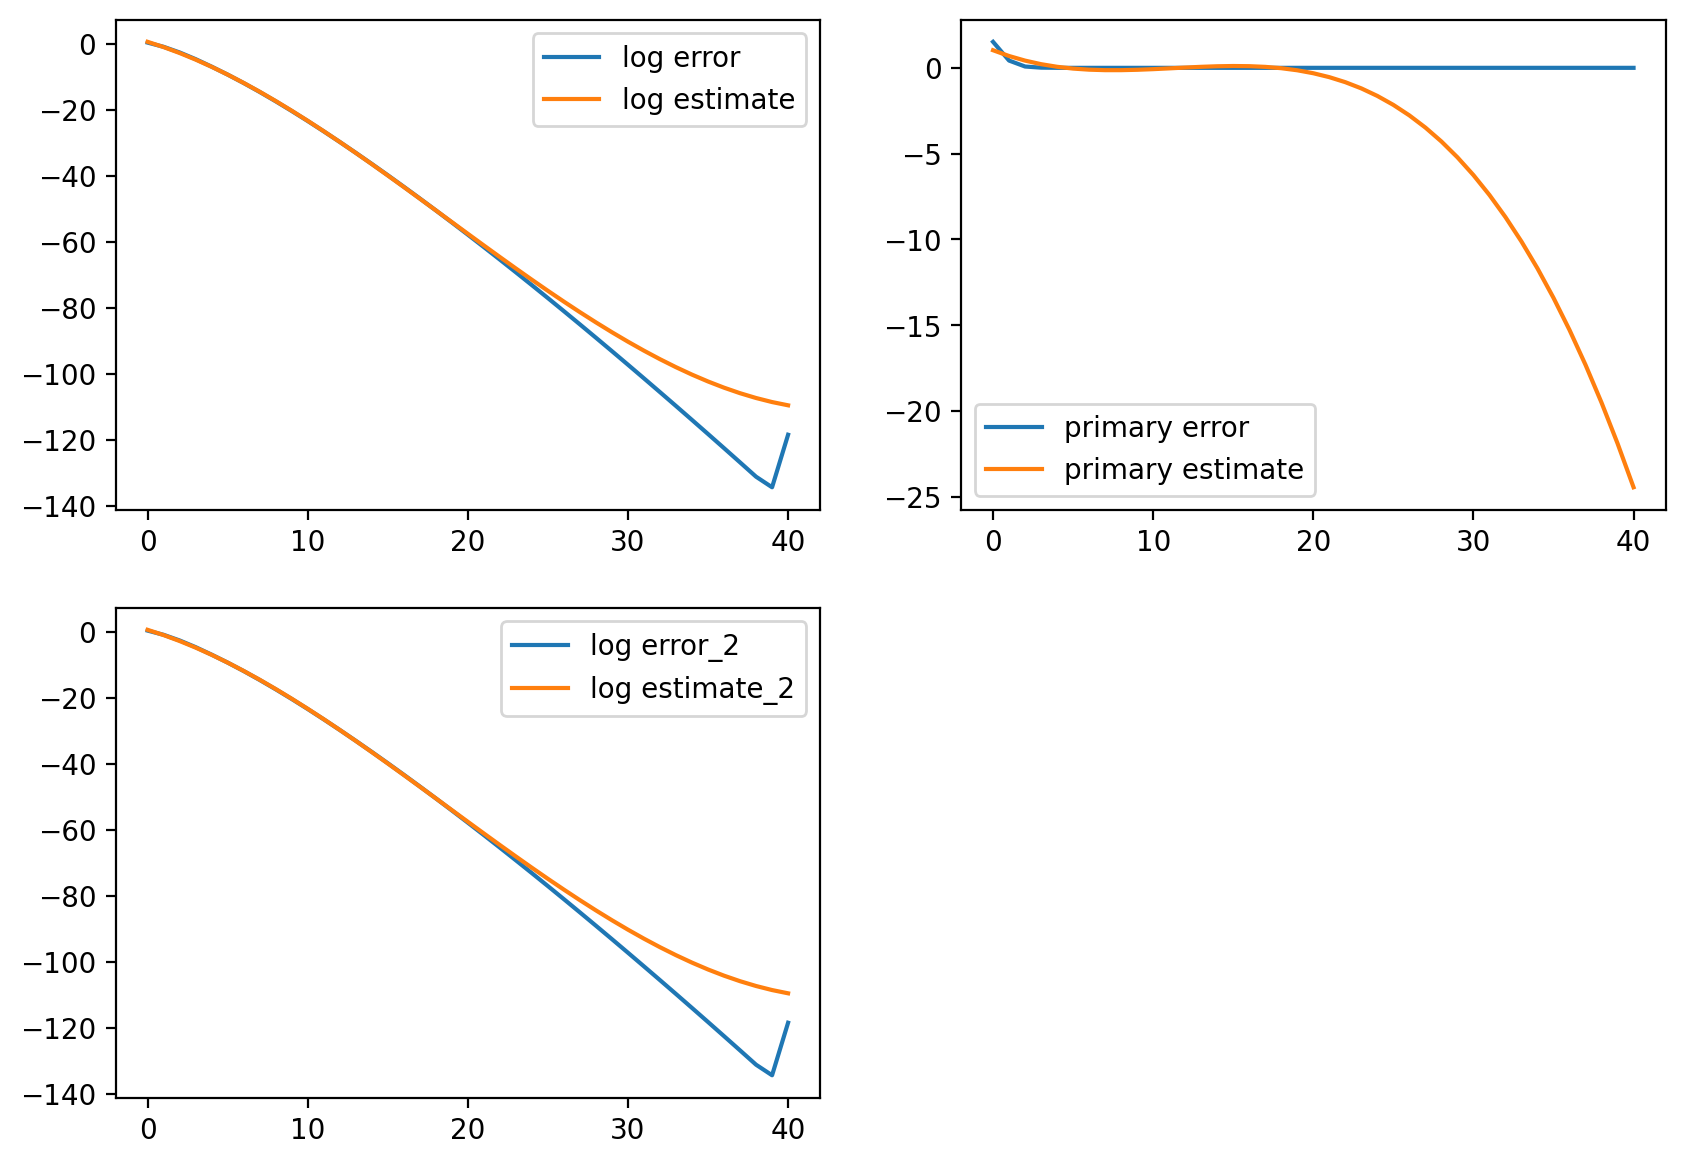

In [13]:
log_error_tilde = np.matmul(A, coef_error)
max_error_tilde = np.matmul(A, coef_error1)
print(log_error_tilde)
plt.figure(figsize=(10,7), dpi=200)
plt.subplot(2,2,1)
plt.plot(n, log_error, label = "log error")
plt.plot(n, log_error_tilde, label = "log estimate")
plt.legend(loc = "best")

plt.subplot(2,2,2)
plt.plot(n, max_error, label = "primary error")
plt.plot(n, max_error_tilde, label = "primary estimate")
plt.legend(loc = "best")

plt.subplot(2,2,3)
plt.plot(n, log_error, label = "log error_2")
log_error_tilde_2 = np.matmul(A, coef_error)
plt.plot(n, log_error_tilde_2, label = "log estimate_2")
plt.legend(loc = "best")
plt.show()

# 考虑log error和n的次数关系

[0.24500778 1.27382186]


/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_68092/3235719765.py:3: RuntimeWarning: divide by zero encountered in log
  deg_A = np.transpose([np.ones_like(n), np.log(n)])[25:35]
/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_68092/3235719765.py:10: RuntimeWarning: divide by zero encountered in log
  deg_est_loglogerr = np.matmul(np.transpose([np.ones_like(n), np.log(n)]), deg_coef)
/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_68092/3235719765.py:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(n)[log_error < 0], np.log(-log_error[log_error < 0]))
/var/folders/22/vljd7pts6hx7gvsntnkblyvm0000gn/T/ipykernel_68092/3235719765.py:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(n), deg_est_loglogerr)


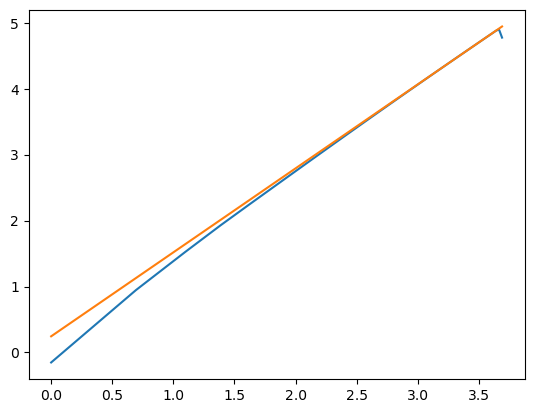

In [14]:
#变量都以deg_开头命名
log_log_error = np.log(-log_error[25:35])
deg_A = np.transpose([np.ones_like(n), np.log(n)])[25:35]
deg_ATA = np.matmul(np.transpose(deg_A), deg_A)
deg_ATB = np.matmul(np.transpose(deg_A), log_log_error)
deg_coef = np.matmul(np.linalg.inv(deg_ATA), deg_ATB)
print(deg_coef)


deg_est_loglogerr = np.matmul(np.transpose([np.ones_like(n), np.log(n)]), deg_coef)
plt.figure()
plt.plot(np.log(n)[log_error < 0], np.log(-log_error[log_error < 0]))
plt.plot(np.log(n), deg_est_loglogerr)

plt.show()


# 关于最佳平方逼近多项式的收敛性的猜想：

1.intuition：在赋范线性函数空间里的一组有限正交基下,随着基的数量增多,其张成的线性子空间越大，原函数在该子空间内的投影在均方意义下逐渐收敛到函数本身。